# Decision Trees

In [1]:
### Reference
# sklearn
# datascienceschool
# towardsdatascience
# https://woolulu.tistory.com/25
# http://m.blog.daum.net/geoscience/1312?category=7023

In [2]:
from sklearn.datasets import load_iris

In [3]:
import pandas as pd

In [38]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import tree

In [53]:
from sklearn.metrics import confusion_matrix

In [5]:
import matplotlib.pyplot as plt

In [148]:
import numpy as np

## iris data

In [7]:
from sklearn.datasets import load_iris
iris = load_iris() # X, y = load_iris(return_X_y=True)
print(iris.DESCR) # iris 데이터 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, dtype="category")
y = y.cat.rename_categories(iris.target_names)
df['species'] = y
print(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [253]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1212)

## Classification

In [311]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1212)
# clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
# clf = clf.fit(df.iloc[:, :4], df.iloc[:, 4])
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1212, splitter='best')


In [306]:
from sklearn.metrics import confusion_matrix
# print(clf.predict_proba(x_test))
print(confusion_matrix(y_train, clf.predict(x_train)))
print('{:.3f}'.format(clf.score(x_train, y_train)))
print(confusion_matrix(y_test, clf.predict(x_test)))
print('{:.3f}'.format(clf.score(x_test, y_test)))

[[37  0  0]
 [ 0 38  0]
 [ 0  0 37]]
1.000
[[13  0  0]
 [ 0 10  2]
 [ 0  1 12]]
0.921


## plot_tree

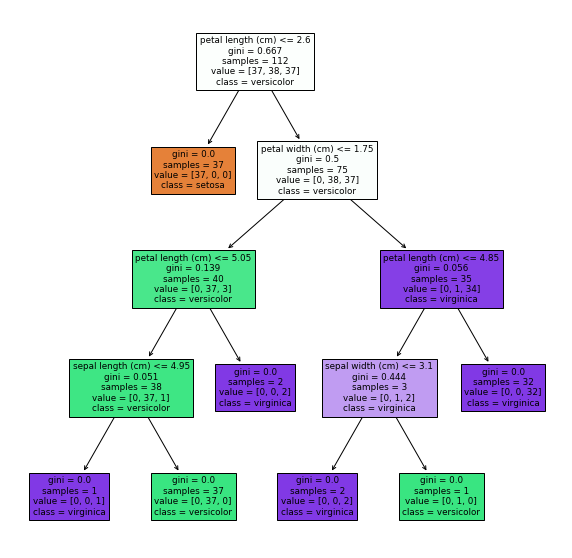

In [307]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True)
plt.show()

## pre-pruning

In [110]:
# 사전 중단

In [314]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1212)
# clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
# clf = clf.fit(df.iloc[:, :4], df.iloc[:, 4])
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1212, splitter='best')


In [309]:
from sklearn.metrics import confusion_matrix
# print(clf.predict_proba(x_test))
print(confusion_matrix(y_train, clf.predict(x_train)))
print('{:.3f}'.format(clf.score(x_train, y_train)))
print(confusion_matrix(y_test, clf.predict(x_test)))
print('{:.3f}'.format(clf.score(x_test, y_test)))

[[37  0  0]
 [ 0 37  1]
 [ 0  3 34]]
0.964
[[13  0  0]
 [ 0 12  0]
 [ 0  2 11]]
0.947


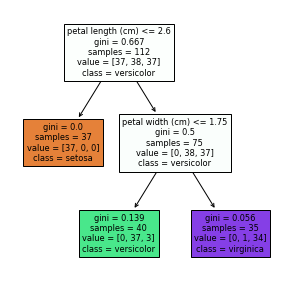

In [310]:
fig, ax = plt.subplots(figsize=(5, 5))
tree.plot_tree(clf,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True)
plt.show()

## post-pruning

## feature importances

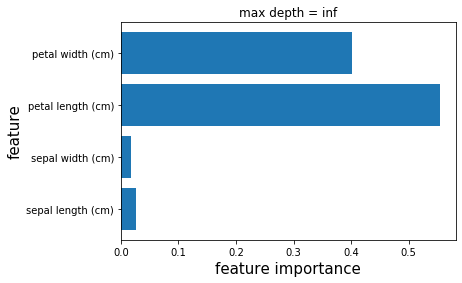

In [313]:
feature_imp = clf.feature_importances_
plt.barh(iris.feature_names, feature_imp)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.title('max depth = inf')
plt.show()

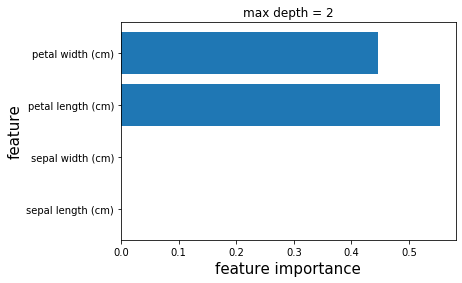

In [315]:
feature_imp = clf.feature_importances_
plt.barh(iris.feature_names, feature_imp)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.title('max depth = 2')
plt.show()

## algorithm

In [278]:
np.c_[x_train, y_train]
np.sort(x_train[:, 2])

array([1. , 1.2, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.9, 1.9, 3.3, 3.5,
       3.5, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. , 4. , 4. , 4.1, 4.1, 4.2,
       4.2, 4.3, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6,
       4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9,
       4.9, 4.9, 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2,
       5.3, 5.3, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.8,
       5.8, 5.9, 5.9, 6. , 6.1, 6.3, 6.4, 6.9])

In [260]:
temp = x_train[:, 0]
# [temp >= temp[i] for i in range(len(temp))]
print(temp >= temp[0])
print(y_train)
print(sum(temp >= temp[0]))
# sum(temp >= temp[0])

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False False
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True False  True  True  True
  True  True  True  True]
[2 2 1 2 2 0 1 0 1 0 1 0 0 2 0 0 1 2 0 1 2 2 1 1 1 0 1 0 0 2 0 2 2 1 2 2 2
 1 1 1 1 1 2 1 0 2 0 0 2 2 0 1 0 0 0 1 1 0 2 2 0 1 1 0 0 2 1 2 2 1 2 0 2 2
 0 1 1 2 2 2 2 0 1 0 0 2 0 0 2 1 1 1 1 0 1 0 0 1 2 0 1 2 1 1 0 2 1 0 2 2 0
 1]
99


In [318]:
def gini(target):
    y_class, class_count = np.unique(target, return_counts=True)
    gini = 1 - sum([(class_count[i] / sum(class_count))**2 
                    for i in range(len(y_class))])
    return np.round(gini, 3)

print('Gini of root node =', gini(y_train))

Gini of root node = 0.667


In [319]:
def info_gain(target, split_feature):
    
    # 분기 전 지니
    gini_before = gini(target)
    
    # 분기 후 지니
    gini_after = [0 for i in range(len(split_feature))]
    for i in range(len(split_feature)):
        A = split_feature < split_feature[i]
        B = split_feature >= split_feature[i]
        gini_after[i] = (sum(A) / len(split_feature) * gini(target[A]) + 
                         sum(B) / len(split_feature) * gini(target[B]))
    split_point = split_feature[np.argmin(gini_after)]
    gini_after = np.min(gini_after)
    
    return split_point, np.round(gini_after, 3)

print('split_point, gini =', info_gain(y_train, x_train[:, 0]))
print('split_point, gini =', info_gain(y_train, x_train[:, 1]))
print('split_point, gini =', info_gain(y_train, x_train[:, 2]))
print('split_point, gini =', info_gain(y_train, x_train[:, 3]))

split_point, gini = (5.5, 0.405)
split_point, gini = (3.4, 0.545)
split_point, gini = (3.3, 0.335)
split_point, gini = (1.0, 0.335)


In [320]:
# setosa 부분: 지니가 0이기 때문에 분기 멈춤. 분기 해도 당연히 지니 0으로 나옴을 확인.
temp = y_train[x_train[:, 2] < 3.3]
print('Gini =', gini(temp))
print('split_point, gini =', info_gain(temp, x_train[:, 0][x_train[:, 2] < 3.3]))
print('split_point, gini =', info_gain(temp, x_train[:, 1][x_train[:, 2] < 3.3]))
print('split_point, gini =', info_gain(temp, x_train[:, 2][x_train[:, 2] < 3.3]))
print('split_point, gini =', info_gain(temp, x_train[:, 3][x_train[:, 2] < 3.3]))

Gini = 0.0
split_point, gini = (5.0, 0.0)
split_point, gini = (3.2, 0.0)
split_point, gini = (1.2, 0.0)
split_point, gini = (0.2, 0.0)


In [321]:
temp = y_train[x_train[:, 2] >= 3.3]
print('Gini = ', gini(temp))
print('split_point, gini =', info_gain(temp, x_train[:, 0][x_train[:, 2] >= 3.3]))
print('split_point, gini =', info_gain(temp, x_train[:, 1][x_train[:, 2] >= 3.3]))
# print(info_gain(temp, x_train[:, 2][x_train[:, 2] < 3.3])) # 이미 사용된 변수
print('split_point, gini =', info_gain(temp, x_train[:, 3][x_train[:, 2] >= 3.3])) # petal width로 분기

Gini =  0.5
split_point, gini = (6.2, 0.413)
split_point, gini = (2.5, 0.442)
split_point, gini = (1.8, 0.1)
